<a href="https://colab.research.google.com/github/KeshavaOfficial/keshav/blob/Projects/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [17]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

<Axes: ylabel='Count'>

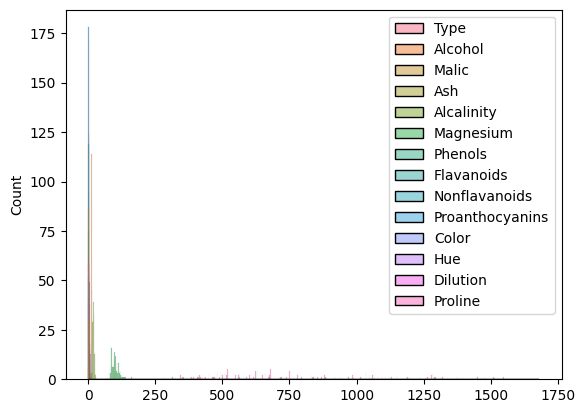

In [4]:
sns.histplot(df)

In [40]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
df_outliers = (q3 - q1)
#lower outlier bound
low_iqr = q1 - 1.5*df_outliers
#upper outlier bound
upper_iqr = q3 + 1.5*df_outliers
#removing outlier
df_outliers = df[~((df < low_iqr) | (df > upper_iqr)).any(axis=1)]


<Axes: ylabel='Count'>

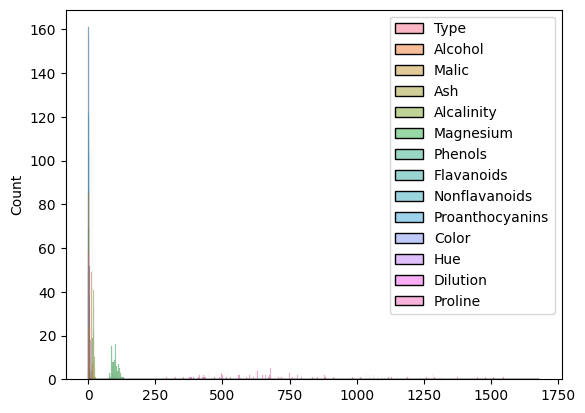

In [32]:
sns.histplot(df_outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x79c522f34f10>,
 'caps': [<matplotlib.lines.Line2D at 0x79c522f37310>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c52c60ef90>],
 'medians': [<matplotlib.lines.Line2D at 0x79c522f35b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c522893c10>],
 'means': []}

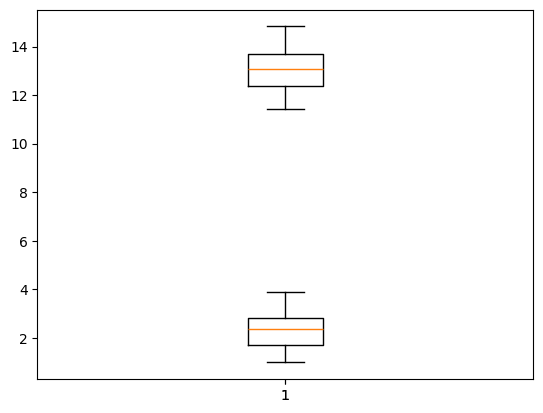

In [33]:
plt.boxplot(df_outliers['Phenols'])
plt.boxplot(df_outliers['Alcohol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c522b9d710>,
 'caps': [<matplotlib.lines.Line2D at 0x79c522b9ecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c522b0f890>],
 'medians': [<matplotlib.lines.Line2D at 0x79c522bb5190>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c522bb59d0>],
 'means': []}

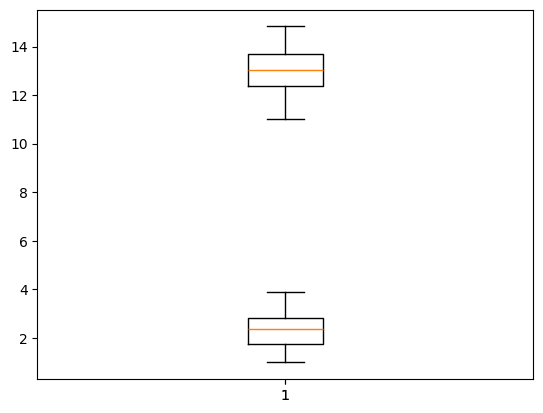

In [34]:
plt.boxplot(df['Alcohol'])
plt.boxplot(df['Phenols'])

<Axes: xlabel='Alcohol', ylabel='Density'>

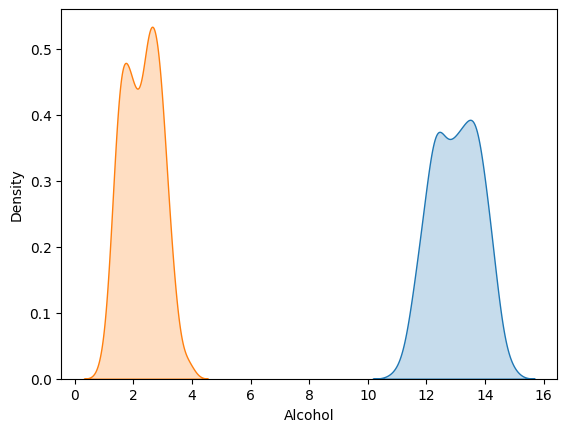

In [35]:
sns.kdeplot(df['Alcohol'], shade=True)
sns.kdeplot(df['Phenols'], shade=True)


<Axes: xlabel='Alcohol', ylabel='Density'>

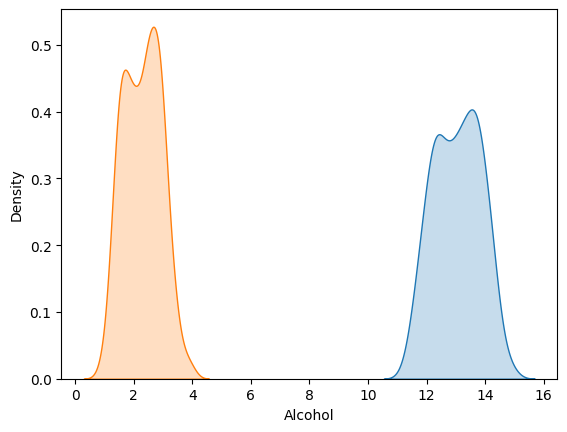

In [36]:
sns.kdeplot(df_outliers['Alcohol'], shade=True)
sns.kdeplot(df_outliers['Phenols'], shade=True)

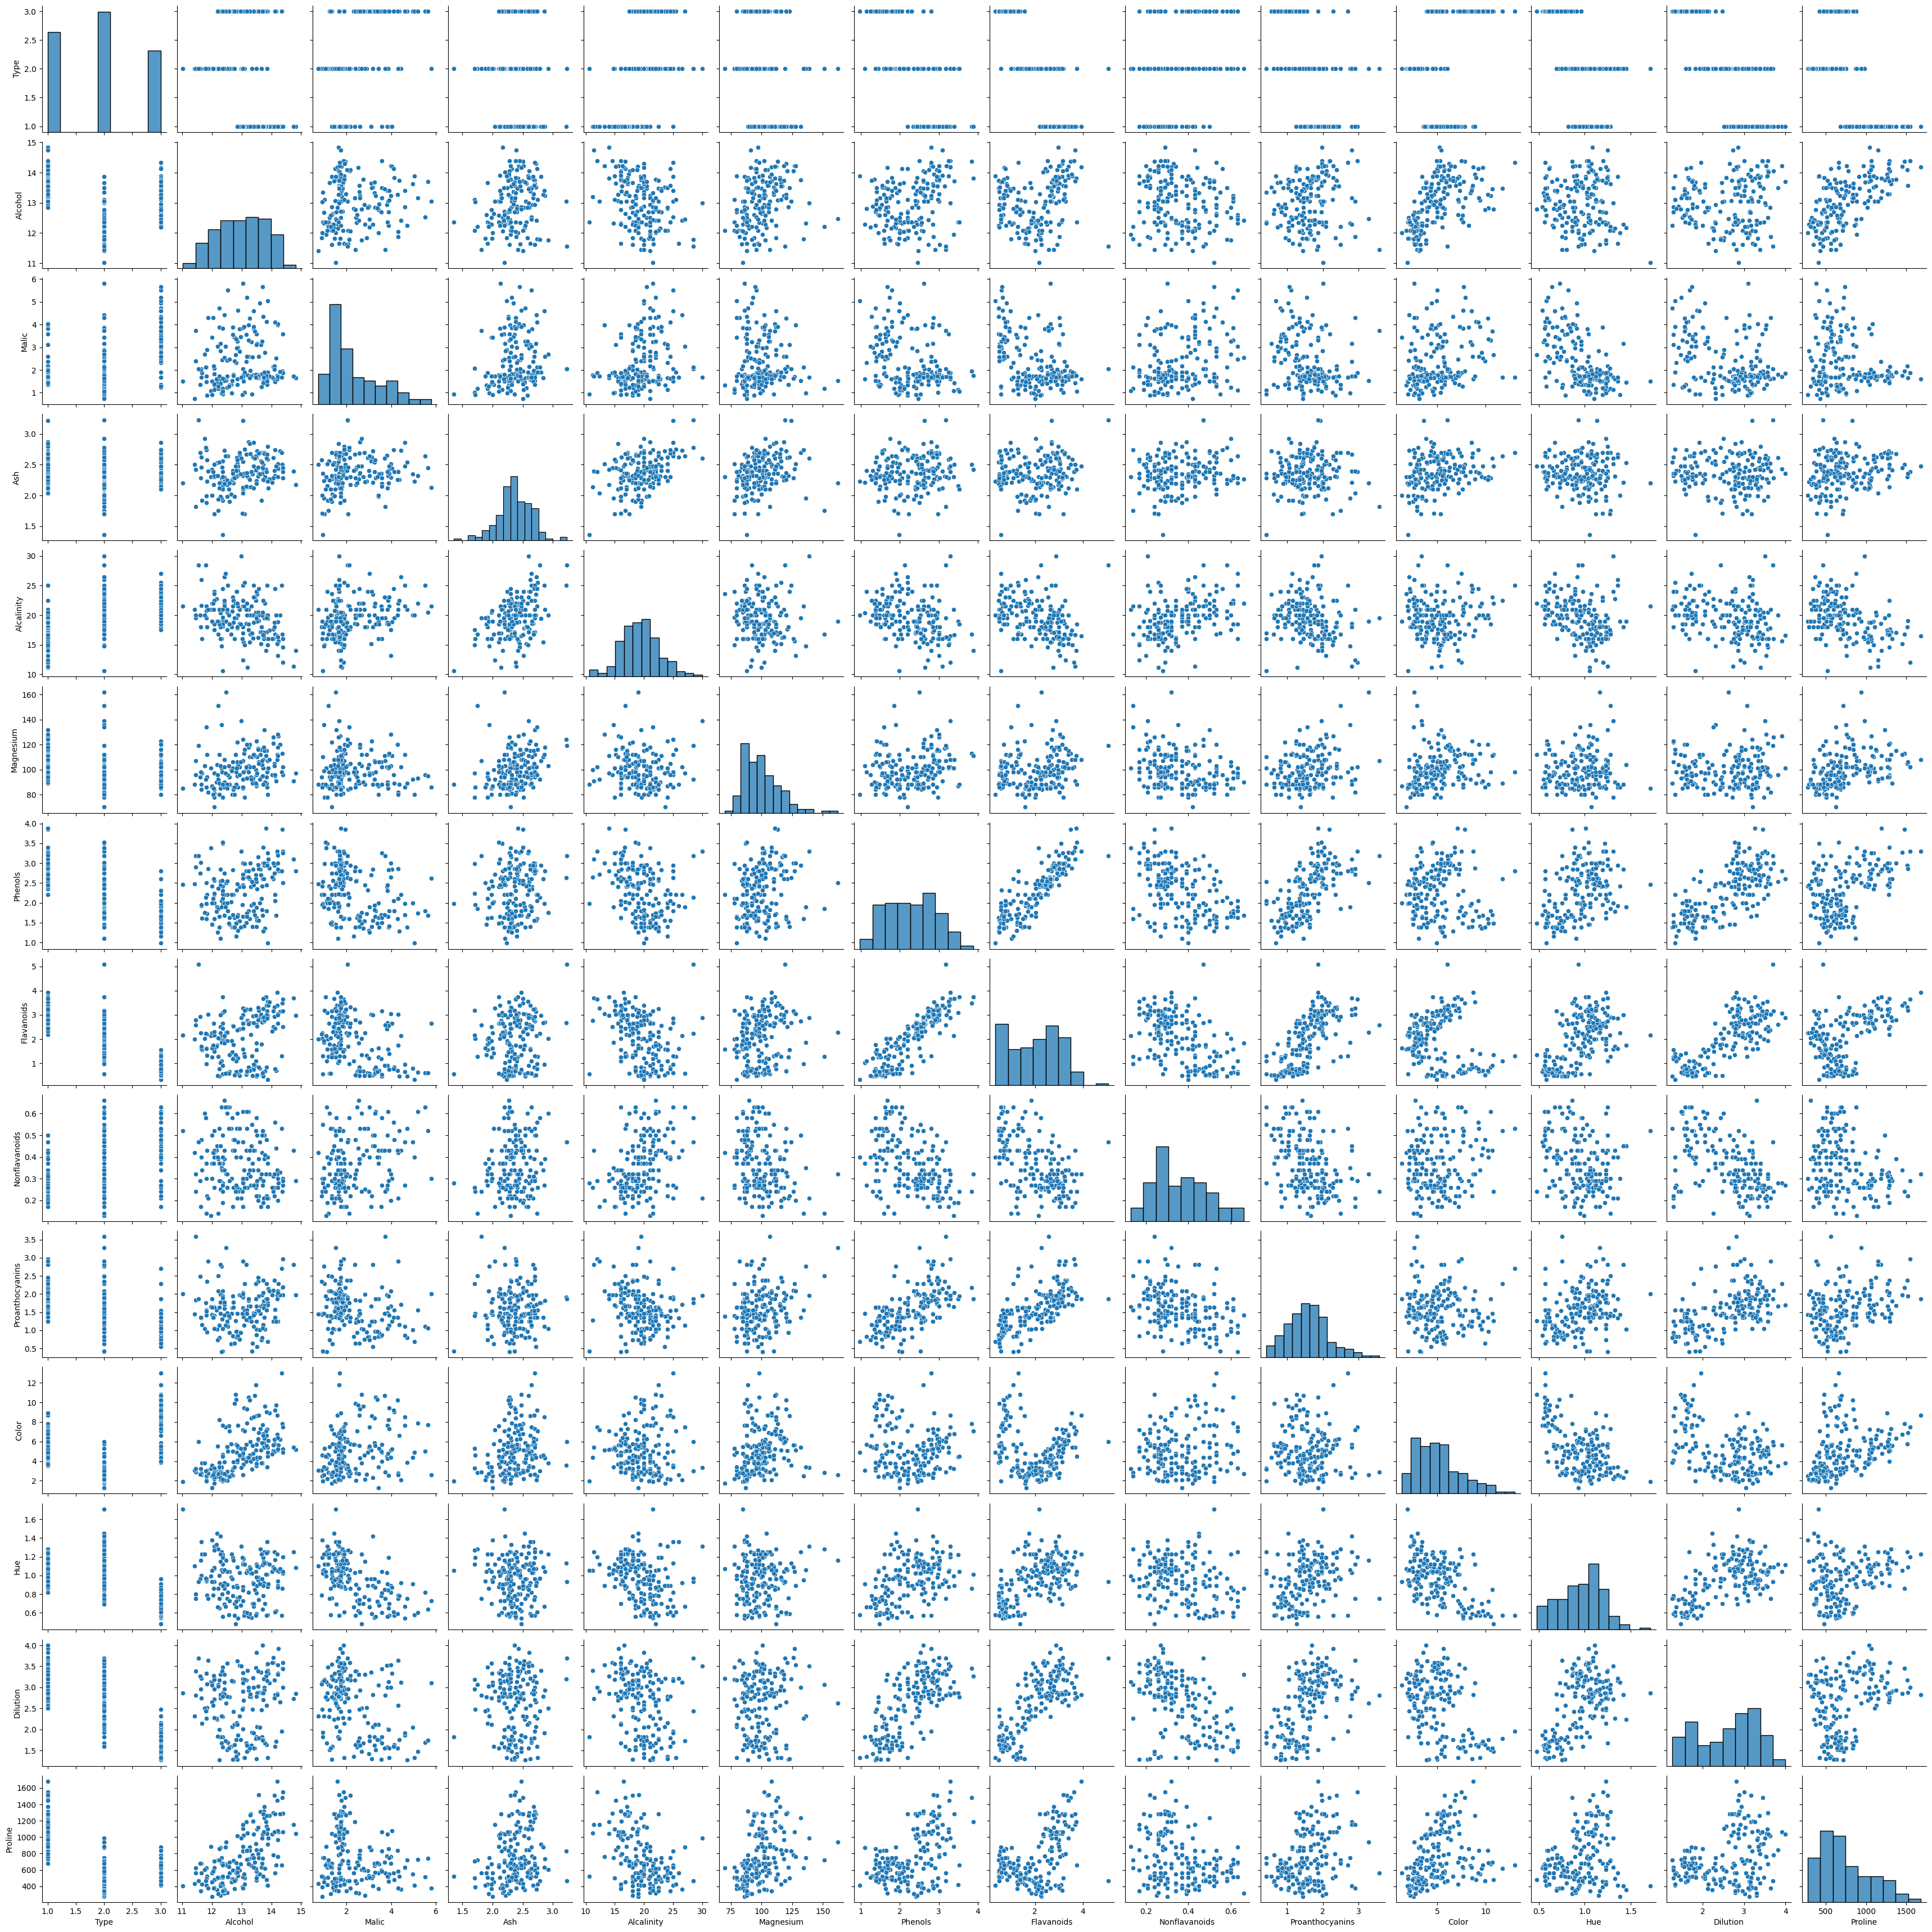

In [37]:
sns.pairplot(df)

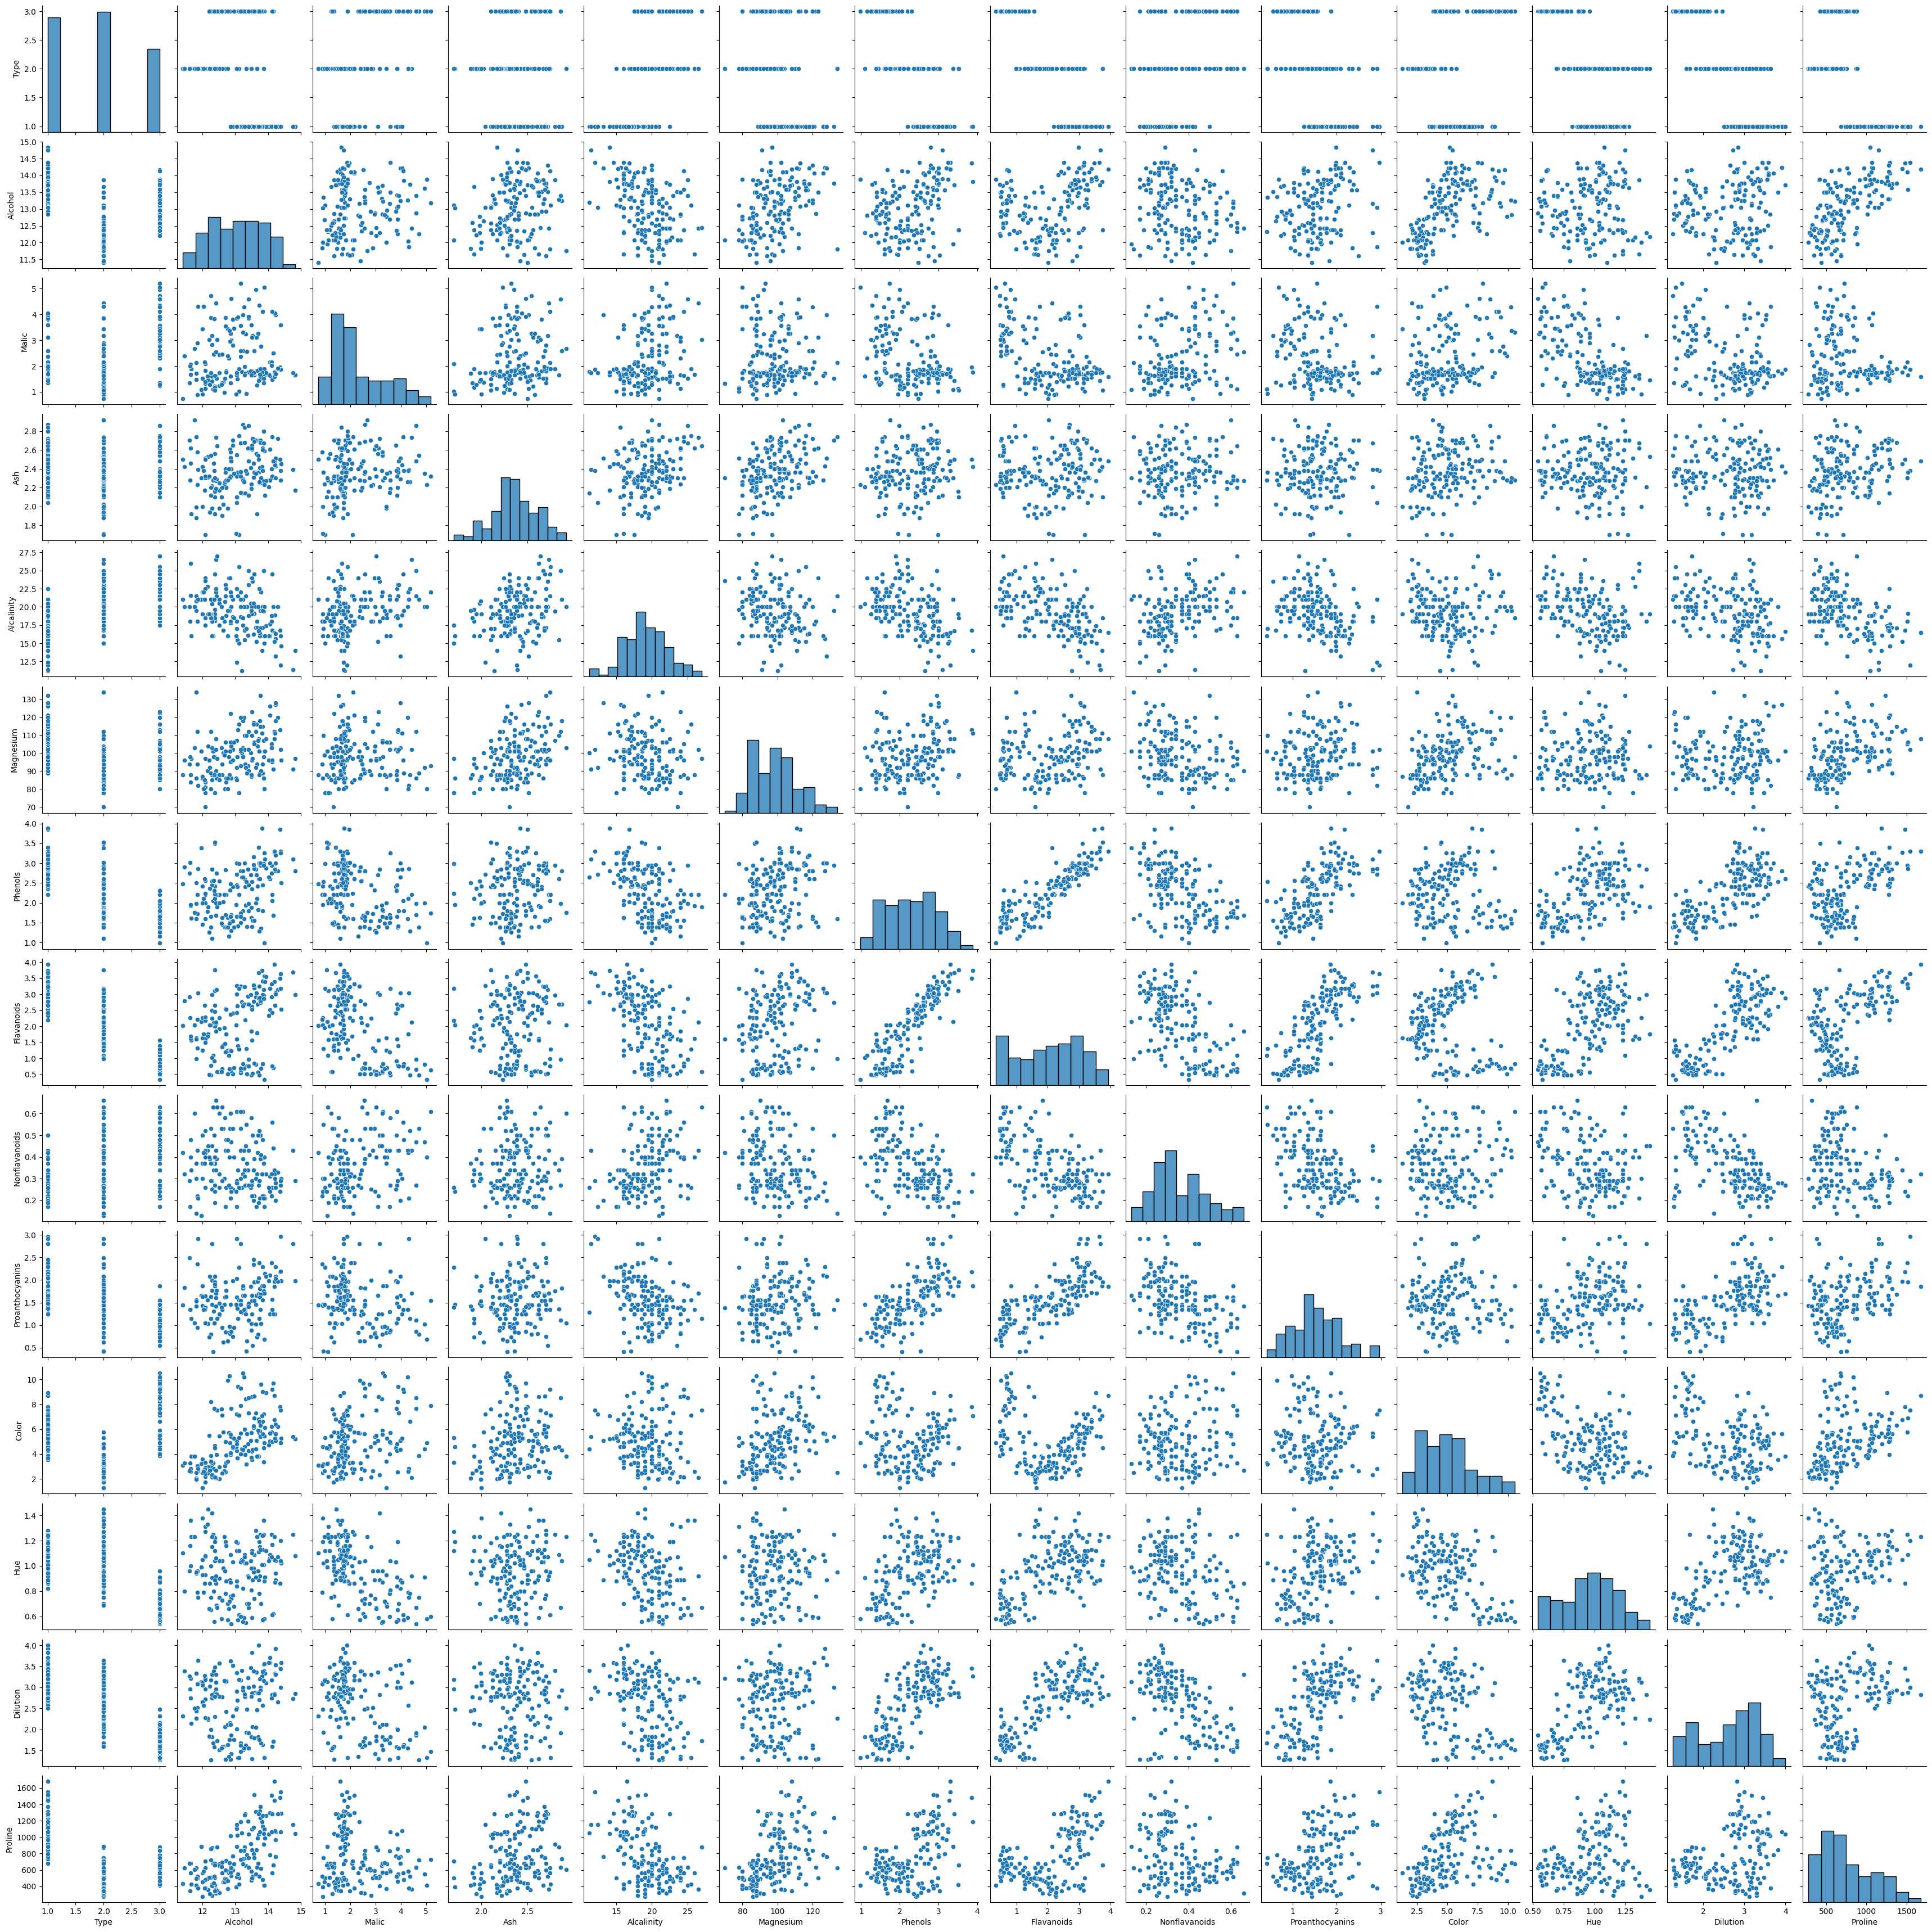

In [38]:
sns.pairplot(df_outliers)

In [42]:
cor_mat = df.corr()

In [43]:
cor_mat

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

In [53]:
cor = cor_mat[cor_mat > 0.6]

In [54]:
cor

Type  Alcohol  Malic  Ash  Alcalinity  Magnesium   Phenols  \
Type              1.0      NaN    NaN  NaN         NaN        NaN       NaN   
Alcohol           NaN  1.00000    NaN  NaN         NaN        NaN       NaN   
Malic             NaN      NaN    1.0  NaN         NaN        NaN       NaN   
Ash               NaN      NaN    NaN  1.0         NaN        NaN       NaN   
Alcalinity        NaN      NaN    NaN  NaN         1.0        NaN       NaN   
Magnesium         NaN      NaN    NaN  NaN         NaN        1.0       NaN   
Phenols           NaN      NaN    NaN  NaN         NaN        NaN  1.000000   
Flavanoids        NaN      NaN    NaN  NaN         NaN        NaN  0.864564   
Nonflavanoids     NaN      NaN    NaN  NaN         NaN        NaN       NaN   
Proanthocyanins   NaN      NaN    NaN  NaN         NaN        NaN  0.612413   
Color             NaN      NaN    NaN  NaN         NaN        NaN       NaN   
Hue               NaN      NaN    NaN  NaN         NaN        NaN       NaN   
Dilution          NaN      NaN    NaN  NaN         NaN        NaN  0.699949   
Proline           NaN  0.64372    NaN  NaN         NaN        NaN       NaN   

                 Flavanoids  Nonflavanoids  Proanthocyanins  Color  Hue  \
Type                    NaN            NaN              NaN    NaN  NaN   
Alcohol                 NaN            NaN              NaN    NaN  NaN   
Malic                   NaN            NaN              NaN    NaN  NaN   
Ash                     NaN            NaN              NaN    NaN  NaN   
Alcalinity              NaN            NaN              NaN    NaN  NaN   
Magnesium               NaN            NaN              NaN    NaN  NaN   
Phenols            0.864564            NaN         0.612413    NaN  NaN   
Flavanoids         1.000000            NaN         0.652692    NaN  NaN   
Nonflavanoids           NaN            1.0              NaN    NaN  NaN   
Proanthocyanins    0.652692            NaN         1.000000    NaN  NaN   
Color                   NaN            NaN              NaN    1.0  NaN   
Hue                     NaN            NaN              NaN    NaN  1.0   
Dilution           0.787194            NaN              NaN    NaN  NaN   
Proline                 NaN            NaN              NaN    NaN  NaN   

                 Dilution  Proline  
Type                  NaN      NaN  
Alcohol               NaN  0.64372  
Malic                 NaN      NaN  
Ash                   NaN      NaN  
Alcalinity            NaN      NaN  
Magnesium             NaN      NaN  
Phenols          0.699949      NaN  
Flavanoids       0.787194      NaN  
Nonflavanoids         NaN      NaN  
Proanthocyanins       NaN      NaN  
Color                 NaN      NaN  
Hue                   NaN      NaN  
Dilution         1.000000      NaN  
Proline               NaN  1.00000

# Standardize

In [62]:
from sklearn.preprocessing import StandardScaler
sc_df = StandardScaler()
df_sc = sc_df.fit_transform(df)

NameError: name 'StandardScalerler' is not defined

In [63]:
df_sc = pd.DataFrame(df_sc)

In [64]:
df_sc.head()

0         1         2         3         4         5         6   \
0 -1.213944  1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997   
1 -1.213944  0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648   
2 -1.213944  0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997   
3 -1.213944  1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446   
4 -1.213944  0.295700  0.227694  1.840403  0.451946  1.281985  0.808997   

         7         8         9         10        11        12        13  
0  1.034819 -0.659563  1.224884  0.251717  0.362177  1.847920  1.013009  
1  0.733629 -0.820719 -0.544721 -0.293321  0.406051  1.113449  0.965242  
2  1.215533 -0.498407  2.135968  0.269020  0.318304  0.788587  1.395148  
3  1.466525 -0.981875  1.032155  1.186068 -0.427544  1.184071  2.334574  
4  0.663351  0.226796  0.401404 -0.319276  0.362177  0.449601 -0.037874

# Implimenting PCA


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pcs = pca.fit_transform(df_sc)

In [66]:
df_pca = pd.DataFrame(df_pcs)

In [183]:
df_pca.head()

0         1         2         3         4         5         6  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

          7         8         9  
0 -0.055637 -0.458765 -1.065570  
1 -1.010372  0.218806  0.020182  
2  0.268957  1.222769  0.106249  
3 -0.618844 -0.114658 -0.107671  
4 -0.434937 -0.261548 -0.112434

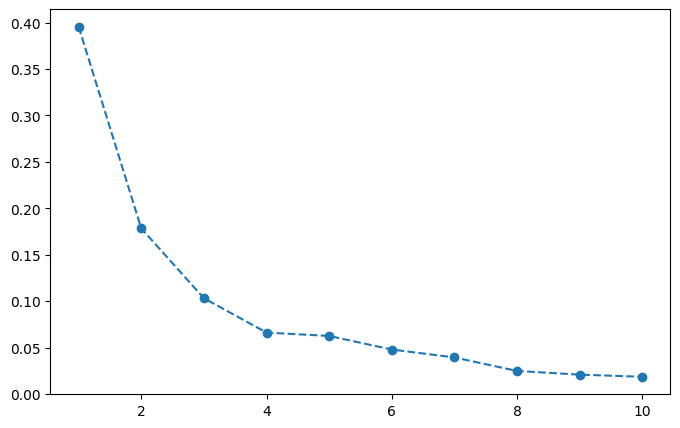

In [184]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')

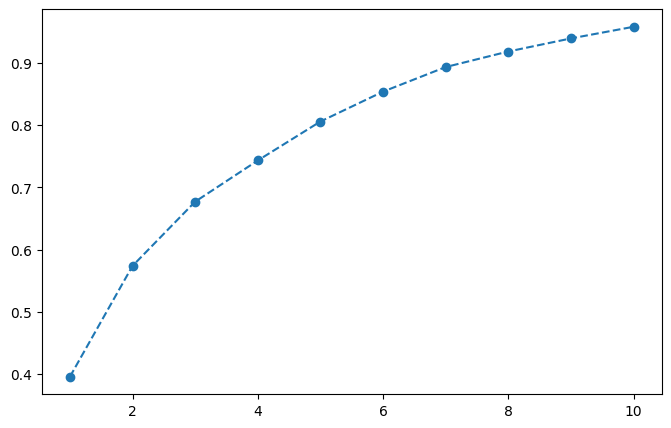

In [185]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')


# Applying Clustering to PCA Transformed DATA




In [186]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(df_pca)
labels = kmeans.fit_predict(df_pca)
inertia.append(kmeans.inertia_)

In [187]:
kmeans

KMeans(n_clusters=3)

In [188]:
inertia = []  # Should store 10 values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=8)
    kmeans.fit(df_pca)  # Train K-Means
    inertia.append(kmeans.inertia_)

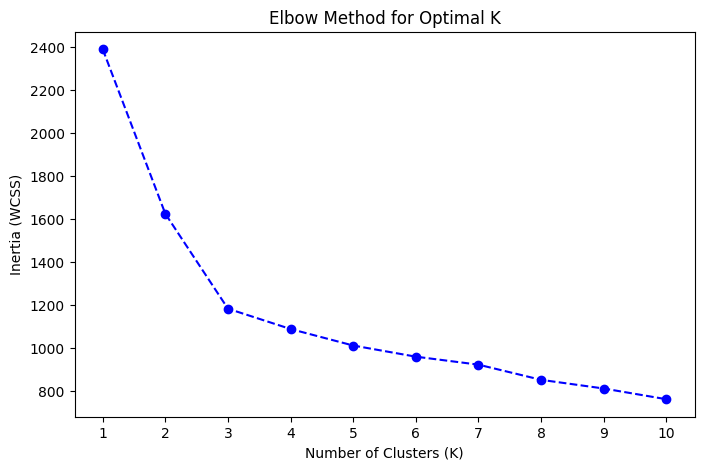

In [189]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.show()

In [190]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_pca, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.3241


# Silhoutte  score is bad so lets change the parameters in clustering


In [191]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df_pca)
labels = kmeans.fit_predict(df_pca)
inertia.append(kmeans.inertia_)

In [192]:
inertia = []  # Should store 10 values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(df_pca)  # Train K-Means
    inertia.append(kmeans.inertia_)

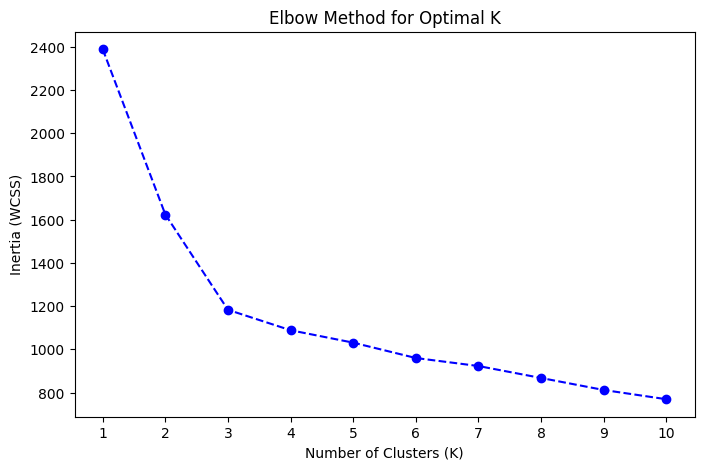

In [193]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.show()

In [194]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_pca, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.2618


# Apply Clustering to the NON PCA dataset (df)

In [195]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df)
labels = kmeans.fit_predict(df)
inertia.append(kmeans.inertia_)

In [196]:
inertia = []  # Should store 10 values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(df)  # Train K-Means
    inertia.append(kmeans.inertia_)

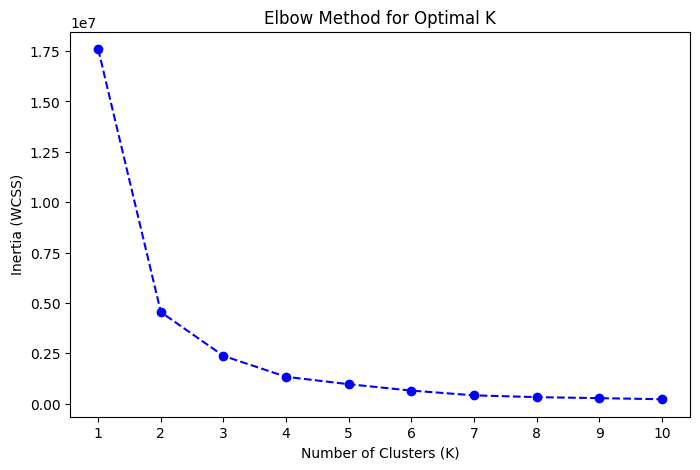

In [197]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.show()

In [198]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5573


# Comparision and Analyst

#Non PCA transformed data
number of clusters = 4
silhoutte score = 0.56
which is good Silhoutte score
# PCA transformed data
number of clusters = 3
silhoutte score = 0.32
which is not good Silhoutte score, so changed the number of Clustres

number of clusters = 8
silhoutte score = 0.14
which is Not good Silhoutte scoreo changed the number of Clustres

number of clusters = 2
silhoutte score = 0.28
which is Not good Silhoutte score,changed the number of Clustres

number of clusters = 4
silhoutte score = 0.24
which is Not good Silhoutte score,changed the number of Clustres


#Conclusion

having 3 clusters for PCA tranformed data is Best score

for,
Non PCA transform data, 4 clusters is ideal